# AMLT Lab_4

# Imports

In [1]:
import piq
import torch
import warnings
import pandas as pd

from skimage.io import imread
from prettytable import PrettyTable
from matplotlib import image as mpimg, pyplot as plt

d:\Miniforge3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from main import rate
warnings.filterwarnings('ignore')

## Data

In [4]:
# Personal evaluation
PE = [4,2,5,5,3,1,5,2,1,4,5,2,5,3,1,5,4,2,1,5]

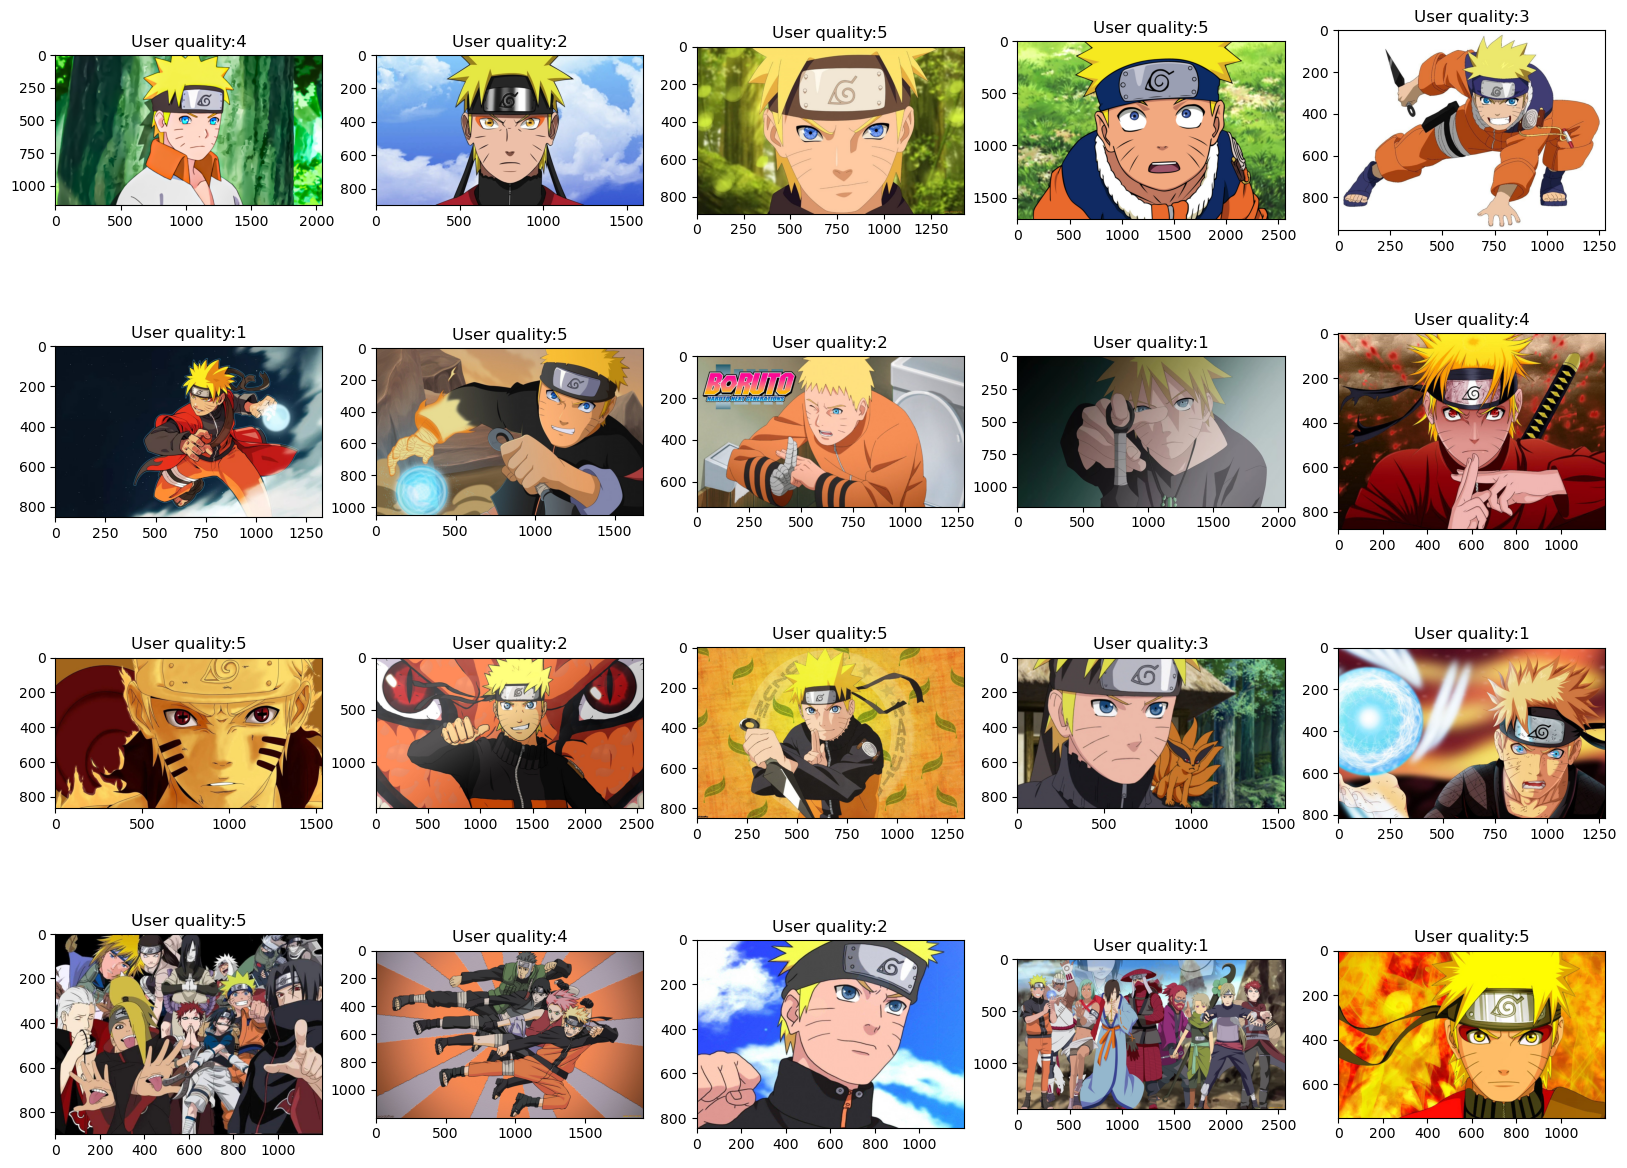

In [5]:

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
for inx, pe in enumerate(PE):
    plt.subplot(4, 5, inx+1, title=f'User quality:{pe}')
    image = mpimg.imread(f'data/{inx}.jpg')
    plt.imshow(image)
plt.show()

## Model

In [6]:
def model(inx, pe):
    tens = torch.tensor(imread(f'data/{inx}.jpg')).permute(2, 0, 1)[None, ...] / 255.

    # Use piq lib to get BRISQUE and TV
    tv: torch.Tensor = piq.total_variation(tens)
    brisque: torch.Tensor = piq.brisque(tens, data_range=1., reduction='none')

    scores, mean, std = rate(f'data/{inx}.jpg')

    model = {'PE' : pe,
                    'TV' : tv.item(),
                    'BRISQUE' : brisque.item(),
                    'NIMA_mean' : mean,
                    'NIMA_std' : std}
    return model

## Results

In [7]:
results = []
res_tab = PrettyTable()
res_tab.field_names = ["Picture", "PE", "TV", "BRISQUE", "NIMA_mean", "NIMA_std"]
for inx, pe in enumerate(PE):
    rez = model(inx, pe)
    results.append(rez)
    res_tab.add_row([inx, pe, rez['TV'], rez['BRISQUE'], rez['NIMA_mean'], rez['NIMA_std']])
print(res_tab)

+---------+----+--------------------+-------------------+--------------------+--------------------+
| Picture | PE |         TV         |      BRISQUE      |     NIMA_mean      |      NIMA_std      |
+---------+----+--------------------+-------------------+--------------------+--------------------+
|    0    | 4  | 83.97361755371094  | 62.20489501953125 | 5.405080318450928  | 1.427417516708374  |
|    1    | 2  | 115.9871597290039  | 58.67572021484375 | 5.419651508331299  | 1.409469485282898  |
|    2    | 5  | 104.5012435913086  | 59.16094970703125 | 5.3936991691589355 | 1.4076759815216064 |
|    3    | 5  | 139.35475158691406 | 73.08404541015625 | 5.407746315002441  | 1.4141117334365845 |
|    4    | 3  | 151.21202087402344 | 76.78280639648438 | 5.408908843994141  | 1.4109035730361938 |
|    5    | 1  | 105.13836669921875 |   54.46728515625  | 5.416780471801758  | 1.4119231700897217 |
|    6    | 5  | 105.14246368408203 | 31.92596435546875 | 5.425393104553223  | 1.4608337879180908 |


In [8]:
pd.DataFrame(results).corr()

,PE,TV,BRISQUE,NIMA_mean,NIMA_std
PE,1.000000,-0.113372,-0.164359,-0.488689,0.025142
TV,-0.113372,1.000000,-0.162669,-0.104443,-0.188555
BRISQUE,-0.164359,-0.162669,1.000000,0.051386,0.014427
NIMA_mean,-0.488689,-0.104443,0.051386,1.000000,0.430301
NIMA_std,0.025142,-0.188555,0.014427,0.430301,1.000000


## Conclusion

As can be seen, **the best result was achieved for the BRISQUE model**. For TV, the result is borderline positive, but still negative. Accordingly, only the BRISQUE model satisfies the conditions.